# New Homepage launch - Hypothesis Test

The first change wants to try is on their homepage. They hope that this new, more engaging design will increase the number of users that explore their courses, that is, move on to the second stage of the funnel.

The metric we will use is the click through rate for the Explore Courses button on the home page. Click through rate (CTR) is often defined as the the number of clicks divided by the number of views. Since the website uses cookies, we can identify unique users and make sure we don't count the same one multiple times. For this experiment, we'll define our click through rate as:

__CTR:__ Clicks by unique users $/$ Views by unique users

Now that we have our metric, let's set up our null and alternative hypotheses:

$$H_{0}: CTR_{new} \leq CTR _{old}$$

$$H_{1}: CTR_{new} > CTR_{old}$$

Our alternative hypothesis is what we want to prove to be true, in this case, that the new homepage design has a higher click through rate than the old homepage design. And the null hypothesis is what we assume to be true before analyzing data, which is that the new homepage design has a click through rate that is less than or equal to that of the old homepage design. As you’ve seen before, we can rearrange our hypotheses to look like this:

$$H_{0}: CTR_{new} - CTR_{old} \leq 0$$

$$H_{1}: CTR_{new} - CTR_{old} > 0$$




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#pull the datset
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


__Total number of action is__

In [2]:
df.shape[0]

8188

__Number of unique users__

In [3]:
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

__Control group size__

In [4]:
df.groupby('group').nunique()

,timestamp,id,group,action
group,,,,
control,4264,3332,1,2
experiment,3924,2996,1,2


__How long was the experiment run for?__

In [5]:
df.timestamp.max(), df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

__What action types are recorded in this dataset__

In [6]:
df.action.unique()

array(['view', 'click'], dtype=object)

__Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?__

The control and experiment pages could have different number of total visitors.
More total clicks could occur in one version, even if there is a greater percentage of clicks in the other version.

__Define the click through rate (CTR) for this experiment.__

The number of unique visitors who click at least once divided by the number of unique visitors who view the page.

__What are the null and alternative hypotheses?__

$$H_{0}: CTR_{new} - CTR_{old} <= 0$$

$$H_{1}: CTR_{new} - CTR_{old} > 0$$

### Question: Does this Experiment page drive higher traffic than the control page?

The given dataset includes view and click action on the mentioned web page. Group shows the two groups, control and experiment users for A/B test. Here our task is to analyze these actions to see if there is significance difference of performance for two version. To do with lets calculate the click through rate of each group.

Lets start with the control group.

In [7]:
#crate a new dataframe by extracting all the actions from the control group and give a new name
control_df = df.query('group=="control"')

In [8]:
#now find the click through rate by finding the number of uniqe users who clicked 
#devided by the number of unique users who viewed

control_ctr = control_df.query('action =="click"').id.nunique()/control_df.query('action =="view"').id.nunique()
control_ctr

0.2797118847539016

__Above gives us a click through rate of 28% for control group.__

In [27]:
# Lets do the same for experiment group
experiment_df = df.query('group =="experiment"')

In [28]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

__This gives us an experiment users click through rate of almost 31%.__

In [29]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

__From the above difference, with the given sample, we can find out that the experiment click through rate is higher about 3% than the control group click through rate.__

Now that we know the observed difference in this sample, we have to see if this difference is significant and not just due to chance.

__Lets bootsrap the sample to simulate the sampling distributin for difference in poroportion__

In [30]:
diffs = []
for _ in range (10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group =="control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action =="click"').id.nunique()/control_df.query('action =="view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

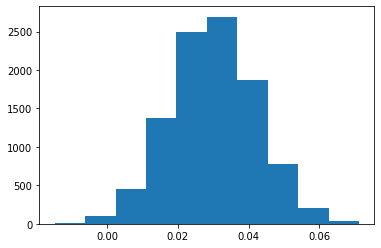

In [31]:
#lets take a look at our sampling distribution

plt.hist(diffs);

We can compute the pvalue for a statistic, which is the observed difference in proportion by  simulating the distribution under the null hypothesis. And then finding the probability that our statistice obtain from this distribution. To simulate from the null, we will create a normal distribution centered at 0 and with the same standard deviation as our sampling distribution we simulated as here. 

In [32]:
diffs = np.array(diffs)
null_vals = np.random.normal(0,np.std(diffs), diffs.size)

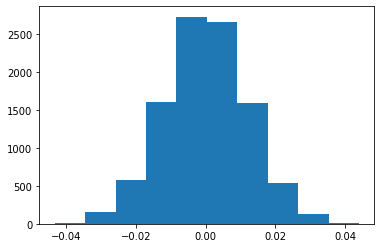

In [33]:
#lets have a look a the null distribution.
plt.hist(null_vals);

__And below red line where our observed statistics fall.__

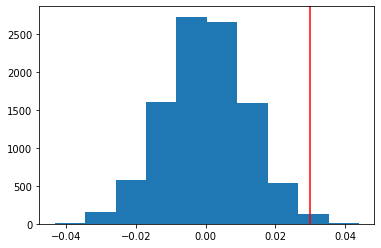

In [34]:
plt.hist(null_vals);
plt.axvline( x = obs_diff, color = 'red');

__We can get the pvalue like below__

In [35]:
(null_vals > obs_diff).mean()

0.0048

With the pvalues of approaximately half of a percentage, the difference in click throuhg rate from control and experiment group is does appeared to be significant. We can reject the null hypothesis. Based on this the new web page must be launched.

__Conclusion:__ Implement the new (experiment) homepage


Let's recap the steps we took to analyze the results of this A/B test.

1. We computed the observed difference between the metric, click through rate, for the control and experiment group.
2. We simulated the sampling distribution for the difference in proportions (or difference in click through rates).
3. We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal 
distribution centered at 0 with the same spread and size.
4. We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
5. We used this p-value to determine the statistical significance of our observed difference.